## LIMPIEZA DE DATOS

In [32]:
import csv
import random

# Parámetros
num_preguntas = 143
num_muestras = 600
opciones_respuesta = ['a', 'b', 'a,b']
generos = ['M', 'F']

# Generar encabezados: id, genero, p1, p2, ..., p143
columnas = ['id', 'genero'] + [f'p{i+1}' for i in range(num_preguntas)]

# Crear y escribir archivo CSV
with open('600_respuestas.csv', mode='w', newline='', encoding='utf-8') as archivo:
    escritor = csv.writer(archivo)
    escritor.writerow(columnas)  # Escribir encabezados

    for i in range(1, num_muestras + 1):
        fila = [i]  # ID
        fila.append(random.choice(generos))  # Género aleatorio
        fila += [random.choice(opciones_respuesta) for _ in range(num_preguntas)]  # Respuestas
        escritor.writerow(fila)

print("Archivo CSV con ID, género y respuestas generado exitosamente.")




Archivo CSV con ID, género y respuestas generado exitosamente.


In [33]:
import pandas as pd

# 1. Leer datos
df = pd.read_csv('600_respuestas.csv', encoding='utf-8')

# 2. Validación de Consistencia y Veracidad
consistency_pairs = [
    ('p13', 'p131'), ('p26', 'p132'), ('p39', 'p133'), ('p52', 'p134'),
    ('p65', 'p135'), ('p78', 'p136'), ('p91', 'p137'), ('p104', 'p138'),
    ('p117', 'p139'), ('p130', 'p140'), ('p143', 'p1')
]

def check_consistency(row):
    return sum(row[i1] != row[i2] for i1, i2 in consistency_pairs)

df['CONS_inconsist'] = df.apply(check_consistency, axis=1)
df['CONS_valida'] = df['CONS_inconsist'] < 5

items_vera = ['p130', 'p131', 'p132', 'p133', 'p134', 'p135']
df['VERA_a_count'] = df[items_vera].apply(lambda row: (row == 'a').sum(), axis=1)
df['VERA_valida'] = df['VERA_a_count'] < 5

# 3. Definir ítems de columnas y filas automáticamente
areas = [
    'CCFM', 'CCSS', 'CCNA', 'CCCO', 'ARTE', 'BURO',
    'CCEP', 'IIAA', 'FINA', 'LING', 'JURI'
]

# COLUMNAS (letra "a")
column_items = {}
for idx, area in enumerate(areas):
    items = [f"p{n}" for n in range(idx+1, 142, 13)]
    column_items[area] = items

# FILAS (letra "b")
row_items = {}
for idx, area in enumerate(areas):
    start = idx*11 + 1
    end = start + 11
    items = [f"p{n}" for n in range(start, end)]
    row_items[area] = items

# 4. Calcular puntajes directos
def count_b_answers(row, items):
    return sum(row[i] == 'b' for i in items)

for area in areas:
    df[area + '_a'] = df[column_items[area]].apply(lambda row: (row == 'a').sum(), axis=1)
    df[area + '_b'] = df.apply(lambda row: count_b_answers(row, row_items[area]), axis=1)
    df[area + '_direct'] = df[area + '_a'] + df[area + '_b']

# 5. Baremos completos para todas las áreas y géneros
baremos = {
    'CCFM': {
        'M': [(0, 4, 1), (5, 7, 2), (8, 9, 3), (10, 13, 4), (14, 15, 5), (16, 17, 6), (18, 22, 7)],
        'F': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 11, 4), (12, 14, 5), (15, 17, 6), (18, 22, 7)]
    },
    'CCSS': {
        'M': [(0, 3, 1), (4, 6, 2), (7, 8, 3), (9, 12, 4), (13, 14, 5), (15, 16, 6), (17, 22, 7)],
        'F': [(0, 4, 1), (5, 7, 2), (8, 9, 3), (10, 14, 4), (15, 16, 5), (17, 19, 6), (20, 22, 7)]
    },
    'CCNA': {
        'M': [(0, 4, 1), (5, 7, 2), (8, 9, 3), (10, 13, 4), (14, 15, 5), (16, 18, 6), (19, 22, 7)],
        'F': [(0, 3, 1), (4, 5, 2), (6, 7, 3), (8, 12, 4), (13, 14, 5), (15, 17, 6), (18, 22, 7)]
    },
    'CCCO': {
        'M': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 10, 4), (11, 13, 5), (14, 17, 6), (18, 22, 7)],
        'F': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 11, 4), (12, 13, 5), (14, 16, 6), (17, 22, 7)]
    },
    'ARTE': {
        'M': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 10, 4), (11, 14, 5), (15, 17, 6), (18, 22, 7)],
        'F': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 11, 4), (12, 13, 5), (14, 16, 6), (17, 22, 7)]
    },
    'BURO': {
        'M': [(0, 3, 1), (4, 5, 2), (6, 7, 3), (8, 11, 4), (12, 13, 5), (14, 16, 6), (17, 22, 7)],
        'F': [(0, 4, 1), (5, 7, 2), (8, 9, 3), (10, 14, 4), (15, 16, 5), (17, 19, 6), (20, 22, 7)]
    },
    'CCEP': {
        'M': [(0, 3, 1), (4, 5, 2), (6, 7, 3), (8, 12, 4), (13, 14, 5), (15, 17, 6), (18, 22, 7)],
        'F': [(0, 2, 1), (3, 5, 2), (6, 7, 3), (8, 12, 4), (13, 14, 5), (15, 17, 6), (18, 22, 7)]
    },
    'IIAA': {
        'M': [(0, 3, 1), (4, 5, 2), (6, 7, 3), (8, 12, 4), (13, 14, 5), (15, 17, 6), (18, 22, 7)],
        'F': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 9, 4), (10, 12, 5), (13, 15, 6), (16, 22, 7)]
    },
    'FINA': {
        'M': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 10, 4), (11, 12, 5), (13, 16, 6), (17, 22, 7)],
        'F': [(0, 2, 1), (3, 5, 2), (6, 7, 3), (8, 12, 4), (13, 14, 5), (15, 17, 6), (18, 22, 7)]
    },
    'LING': {
        'M': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 9, 4), (10, 12, 5), (13, 15, 6), (16, 22, 7)],
        'F': [(0, 2, 1), (3, 5, 2), (6, 7, 3), (8, 12, 4), (13, 14, 5), (15, 17, 6), (18, 22, 7)]
    },
    'JURI': {
        'M': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 10, 4), (11, 13, 5), (14, 16, 6), (17, 22, 7)],
        'F': [(0, 2, 1), (3, 4, 2), (5, 6, 3), (7, 11, 4), (12, 13, 5), (14, 16, 6), (17, 22, 7)]
    }
}

categorias = {
    1: 'Desinterés Definitivo',
    2: 'Bajo Interés',
    3: 'Promedio Bajo',
    4: 'Promedio',
    5: 'Promedio Alto',
    6: 'Alto Interés',
    7: 'Muy Alto Interés'
}

def asignar_categoria(area, puntaje, genero):
    baremo = baremos.get(area, {}).get(genero, [])
    for rango in baremo:
        if rango[0] <= puntaje <= rango[1]:
            return categorias[rango[2]]
    return 'Fuera de rango'

# 6. Asignar la categoría para todas las áreas
for area in areas:
    col_direct = f"{area}_direct"
    col_cat = f"{area}_categoria"
    df[col_cat] = df.apply(lambda row: asignar_categoria(area, row[col_direct], row['genero']), axis=1)

# 7. Identifica el área mejor puntuada y su categoría
def perfil_probable(row):
    puntajes = {area: row[f"{area}_direct"] for area in areas}
    mejor_area = max(puntajes, key=puntajes.get)
    mejor_categoria = row[f"{mejor_area}_categoria"]
    return f"{mejor_area}"

df['perfil_probable'] = df.apply(perfil_probable, axis=1)

# 8. Exporta el resultado
df.to_csv('resultados_vocacionales_perfil30.csv', index=False)
print("¡Análisis completo! Resultados guardados en 'resultados_vocacionales_perfil.xlsx'")


¡Análisis completo! Resultados guardados en 'resultados_vocacionales_perfil.xlsx'


=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

        ARTE       0.60      1.00      0.75         3
        BURO       0.25      1.00      0.40         1
        CCCO       0.33      0.67      0.44         3
        CCEP       0.50      0.50      0.50         2
        CCFM       0.50      0.67      0.57         6
        CCNA       1.00      0.67      0.80         3
        CCSS       1.00      0.43      0.60         7
        FINA       0.67      0.67      0.67         3
        IIAA       1.00      0.71      0.83         7
        JURI       1.00      0.67      0.80         3
        LING       0.00      0.00      0.00         2

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.58        40
weighted avg       0.73      0.62      0.63        40



C:\Windows\System32\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


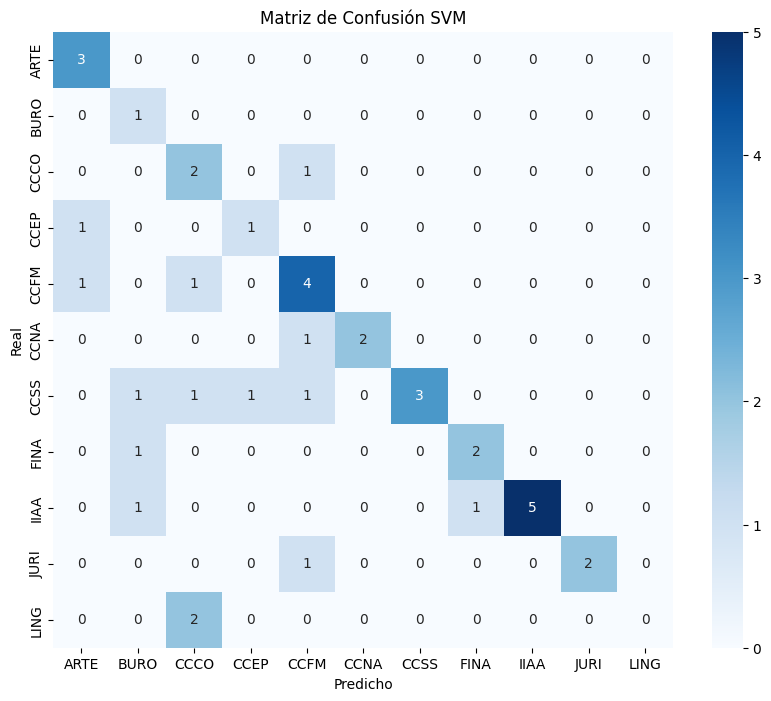

In [37]:
##SVM
import pandas as pd

# Carga tus datos (ajusta el nombre del archivo si es necesario)
df = pd.read_csv('resultados_vocacionales_perfil3.csv')

# Lista de áreas (ajusta si tu archivo tiene otros nombres)
areas = [
    'CCFM', 'CCSS', 'CCNA', 'CCCO', 'ARTE', 'BURO',
    'CCEP', 'IIAA', 'FINA', 'LING', 'JURI'
]

# Si no tienes la columna 'perfil', créala:
def perfil_area(row):
    puntajes = {area: row[f"{area}_direct"] for area in areas}
    mejor_area = max(puntajes, key=puntajes.get)
    return mejor_area

if 'perfil' not in df.columns:
    df['perfil'] = df.apply(perfil_area, axis=1)

# Variables predictoras y objetivo
X = df[[f"{area}_direct" for area in areas]]
y = df['perfil']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Codifica las etiquetas de perfil
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Entrena el modelo SVM
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train_enc)

from sklearn.metrics import classification_report, confusion_matrix

# Predicción
y_pred = svm.predict(X_test)

# Reporte de clasificación
print("=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión SVM')
plt.show()

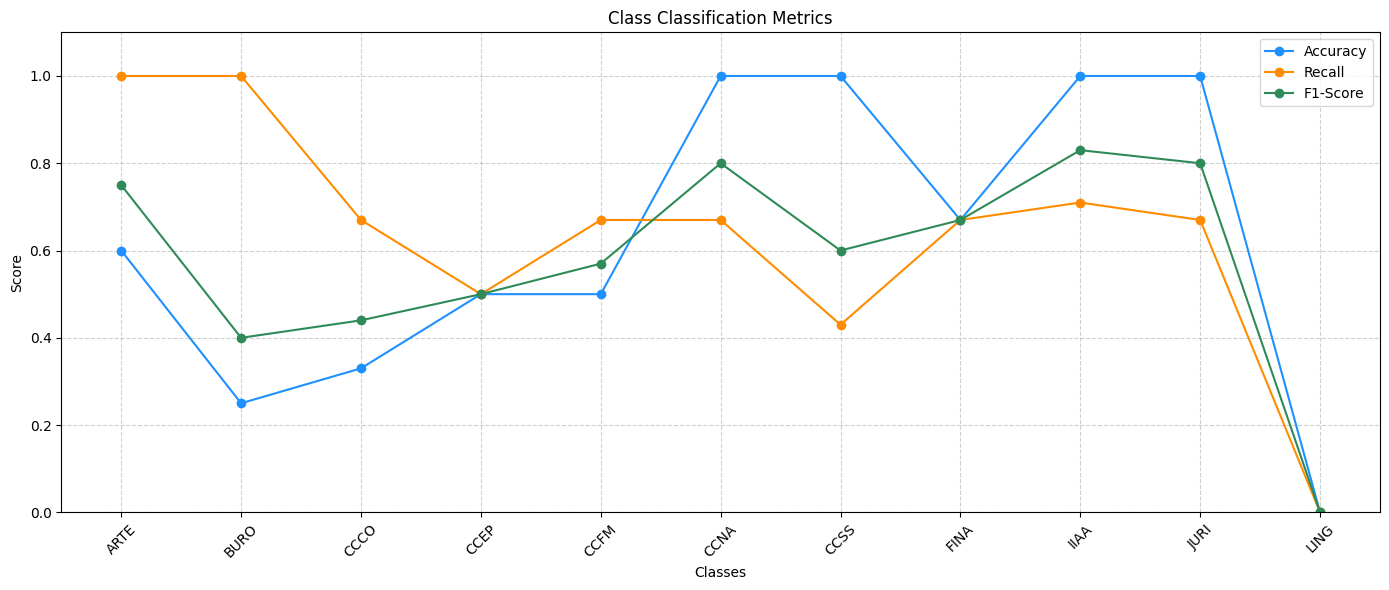

In [48]:
import matplotlib.pyplot as plt

# Nombres de las clases
clases = ['ARTE', 'BURO', 'CCCO', 'CCEP', 'CCFM', 'CCNA', 'CCSS', 'FINA', 'IIAA', 'JURI', 'LING']

# Valores del nuevo reporte
precision = [0.60, 0.25, 0.33, 0.50, 0.50, 1.00, 1.00, 0.67, 1.00, 1.00, 0.00]
recall    = [1.00, 1.00, 0.67, 0.50, 0.67, 0.67, 0.43, 0.67, 0.71, 0.67, 0.00]
f1_score  = [0.75, 0.40, 0.44, 0.50, 0.57, 0.80, 0.60, 0.67, 0.83, 0.80, 0.00]

# Crear figura
plt.figure(figsize=(14,6))

# Graficar líneas
plt.plot(clases, precision, marker='o', label='Accuracy', color='dodgerblue')
plt.plot(clases, recall, marker='o', label='Recall', color='darkorange')
plt.plot(clases, f1_score, marker='o', label='F1-Score', color='seagreen')

# Configuración del gráfico
plt.title('Class Classification Metrics')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Cargar datos
df = pd.read_excel("2000rs_resultados.xlsx")

# 2. Definir columnas de preguntas y columna resultado
columnas_preguntas = [f'p{i}' for i in range(1, 144)]  # p1, p2, ..., p143
columna_resultado = 'resultado'

# 3. Eliminar filas con datos nulos en preguntas o resultado
columnas_a_chequear = columnas_preguntas + [columna_resultado]
df = df.dropna(subset=columnas_a_chequear)

# 4. Función para limpiar respuestas (convierte 'a,b' en ['a', 'b'])
def limpiar_respuesta(respuesta):
    if isinstance(respuesta, str):
        return [r.strip() for r in respuesta.split(',')]
    else:
        return []

# 5. Aplicar limpieza a todas las columnas de preguntas (más eficiente con applymap)
df[columnas_preguntas] = df[columnas_preguntas].map(limpiar_respuesta)

# 6. Copiar DataFrame para evitar fragmentación de memoria
df = df.copy()

# 7. Codificar la columna resultado para el modelo
le = LabelEncoder()
df['resultado_label'] = le.fit_transform(df[columna_resultado])
df.to_excel("data2000clean2rs.xlsx", index=False)
# 8. Revisar resultados
print(df.head())
print(df['resultado_label'].value_counts())

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# Cargar tu data
df = pd.read_excel('data2000clean2r.xlsx')

# Convertir cadenas de listas a listas reales
def str_to_list(x):
    if pd.isna(x) or x == "[]":
        return []
    return eval(x)

cols_preguntas = [c for c in df.columns if c.startswith('p')]
for c in cols_preguntas:
    df[c] = df[c].apply(str_to_list)

# Contar cuántas veces aparece 'a' y 'b' por fila
def count_responses(row):
    count_a = 0
    count_b = 0
    for c in cols_preguntas:
        res = row[c]
        if isinstance(res, list):
            count_a += res.count('a')
            count_b += res.count('b')
    return pd.Series({'count_a': count_a, 'count_b': count_b})

# Agrega columnas al dataframe
counts = df.apply(count_responses, axis=1)
df = pd.concat([df, counts], axis=1)

# ================================
# 📊 1. Distribución de clases
# ================================
plt.figure(figsize=(8, 5))
sns.countplot(x='resultado_label', data=df)
plt.title("Distribución de Clases (resultado_label)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de ejemplos")
plt.show()

# ================================
# 📈 2. Matriz de correlación
# ================================
plt.figure(figsize=(6, 5))
corr = df[['count_a', 'count_b', 'resultado_label']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


## MLP

C:\Windows\System32\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

        ARTE       1.00      0.67      0.80         3
        BURO       0.00      0.00      0.00         1
        CCCO       0.25      0.33      0.29         3
        CCEP       1.00      1.00      1.00         2
        CCFM       0.42      0.83      0.56         6
        CCNA       0.50      0.33      0.40         3
        CCSS       1.00      0.43      0.60         7
        FINA       1.00      0.67      0.80         3
        IIAA       0.88      1.00      0.93         7
        JURI       0.50      0.33      0.40         3
        LING       1.00      0.50      0.67         2

    accuracy                           0.62        40
   macro avg       0.69      0.55      0.59        40
weighted avg       0.73      0.62      0.64        40



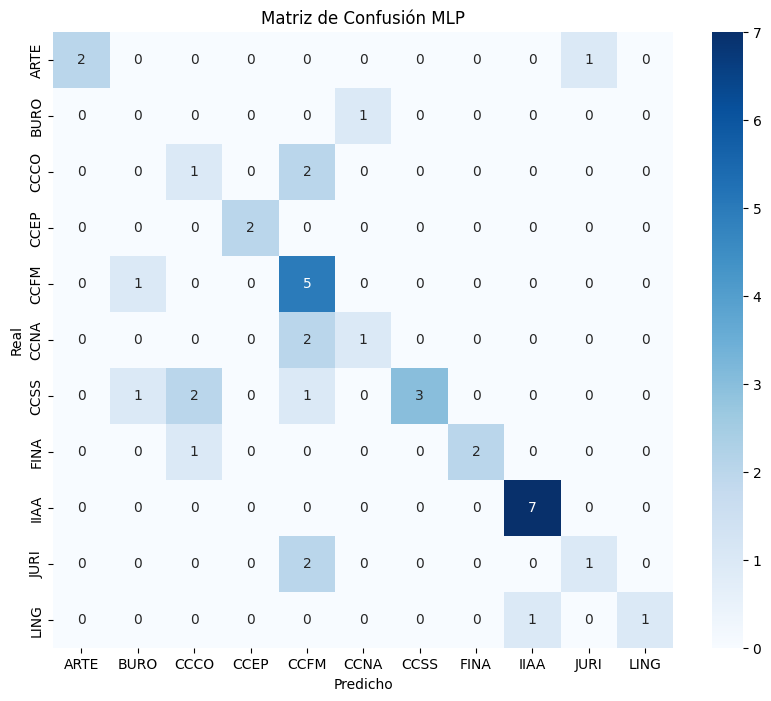

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carga tu archivo, ajusta el nombre si es necesario
df = pd.read_csv('resultados_vocacionales_perfil3.csv')  # O el archivo que corresponda

# Lista de áreas según tus columnas
areas = [
    'CCFM', 'CCSS', 'CCNA', 'CCCO', 'ARTE', 'BURO',
    'CCEP', 'IIAA', 'FINA', 'LING', 'JURI'
]

# Si no tienes la columna 'perfil', créala:
def perfil_area(row):
    puntajes = {area: row[f"{area}_direct"] for area in areas}
    mejor_area = max(puntajes, key=puntajes.get)
    return mejor_area

if 'perfil' not in df.columns:
    df['perfil'] = df.apply(perfil_area, axis=1)

# Variables predictoras y objetivo
X = df[[f"{area}_direct" for area in areas]]
y = df['perfil']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificación de etiquetas y escalado de datos
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train_enc)

# Evaluación
y_pred = mlp.predict(X_test_scaled)
print("=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión MLP')
plt.show()

# Ejemplo de predicción para un nuevo registro (ajusta los valores)
# nuevo = [[6, 6, 3, 9, 4, 8, 3, 7, 4, 9, 2]]
# nuevo_scaled = scaler.transform(nuevo)
# pred = mlp.predict(nuevo_scaled)
# print("Perfil vocacional predicho:", le.inverse_transform(pred)[0])


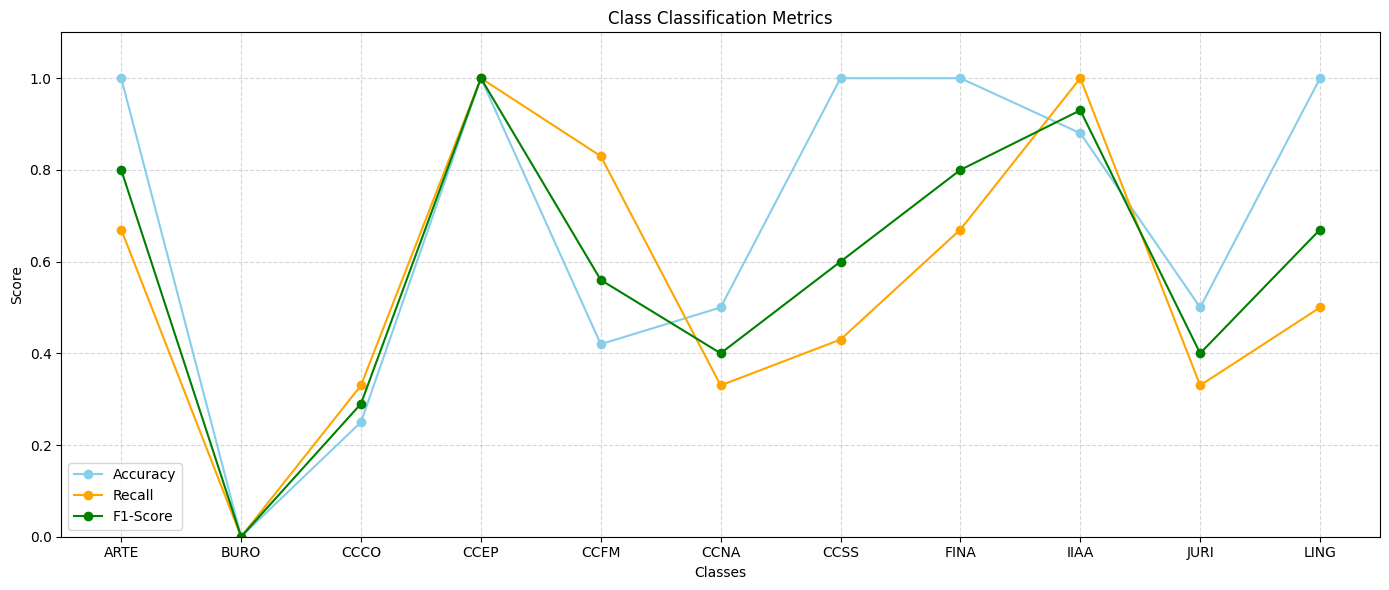

In [46]:
import matplotlib.pyplot as plt

# Clases
clases = ['ARTE', 'BURO', 'CCCO', 'CCEP', 'CCFM', 'CCNA', 'CCSS', 'FINA', 'IIAA', 'JURI', 'LING']

# Métricas por clase
precision = [1.00, 0.00, 0.25, 1.00, 0.42, 0.50, 1.00, 1.00, 0.88, 0.50, 1.00]
recall    = [0.67, 0.00, 0.33, 1.00, 0.83, 0.33, 0.43, 0.67, 1.00, 0.33, 0.50]
f1_score  = [0.80, 0.00, 0.29, 1.00, 0.56, 0.40, 0.60, 0.80, 0.93, 0.40, 0.67]

plt.figure(figsize=(14,6))

# Graficar líneas
plt.plot(clases, precision, marker='o', label='Accuracy', linestyle='-', color='skyblue')
plt.plot(clases, recall, marker='o', label='Recall', linestyle='-', color='orange')
plt.plot(clases, f1_score, marker='o', label='F1-Score', linestyle='-', color='green')

# Detalles del gráfico
plt.title('Class Classification Metrics')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Mostrar
plt.show()

In [42]:

import sys
print(sys.executable)

C:\Windows\System32\tf_env\Scripts\python.exe


In [57]:
##RF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carga tu archivo, ajusta el nombre si es necesario
df = pd.read_csv('resultados_vocacionales_perfil3.csv')  # O tu archivo de resultados

# Lista de áreas según tus columnas
areas = [
    'CCFM', 'CCSS', 'CCNA', 'CCCO', 'ARTE', 'BURO',
    'CCEP', 'IIAA', 'FINA', 'LING', 'JURI'
]

# Si no tienes la columna 'perfil', créala:
def perfil_area(row):
    puntajes = {area: row[f"{area}_direct"] for area in areas}
    mejor_area = max(puntajes, key=puntajes.get)
    return mejor_area

if 'perfil' not in df.columns:
    df['perfil'] = df.apply(perfil_area, axis=1)

# Variables predictoras y objetivo
X = df[[f"{area}_direct" for area in areas]]
y = df['perfil']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificación de etiquetas
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Entrenamiento del modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_enc)

# Evaluación
y_pred = rf.predict(X_test)
print("=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

import joblib

# Guarda el modelo Random Forest
joblib.dump(rf, 'modelo_rf.pkl')

# Guarda el LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

print("Modelo y encoder guardados exitosamente.")

# Ejemplo de predicción para un nuevo registro (ajusta los valores)
# nuevo = [[6, 6, 3, 9, 4, 8, 3, 7, 4, 9, 2]]
# pred = rf.predict(nuevo)
# print("Perfil vocacional predicho:", le.inverse_transform(pred)[0])


=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

        ARTE       0.50      0.67      0.57         3
        BURO       0.50      1.00      0.67         1
        CCCO       0.60      1.00      0.75         3
        CCEP       0.50      0.50      0.50         2
        CCFM       0.86      1.00      0.92         6
        CCNA       1.00      1.00      1.00         3
        CCSS       1.00      0.57      0.73         7
        FINA       0.67      0.67      0.67         3
        IIAA       1.00      0.57      0.73         7
        JURI       0.75      1.00      0.86         3
        LING       0.50      0.50      0.50         2

    accuracy                           0.75        40
   macro avg       0.72      0.77      0.72        40
weighted avg       0.80      0.75      0.75        40

Modelo y encoder guardados exitosamente.


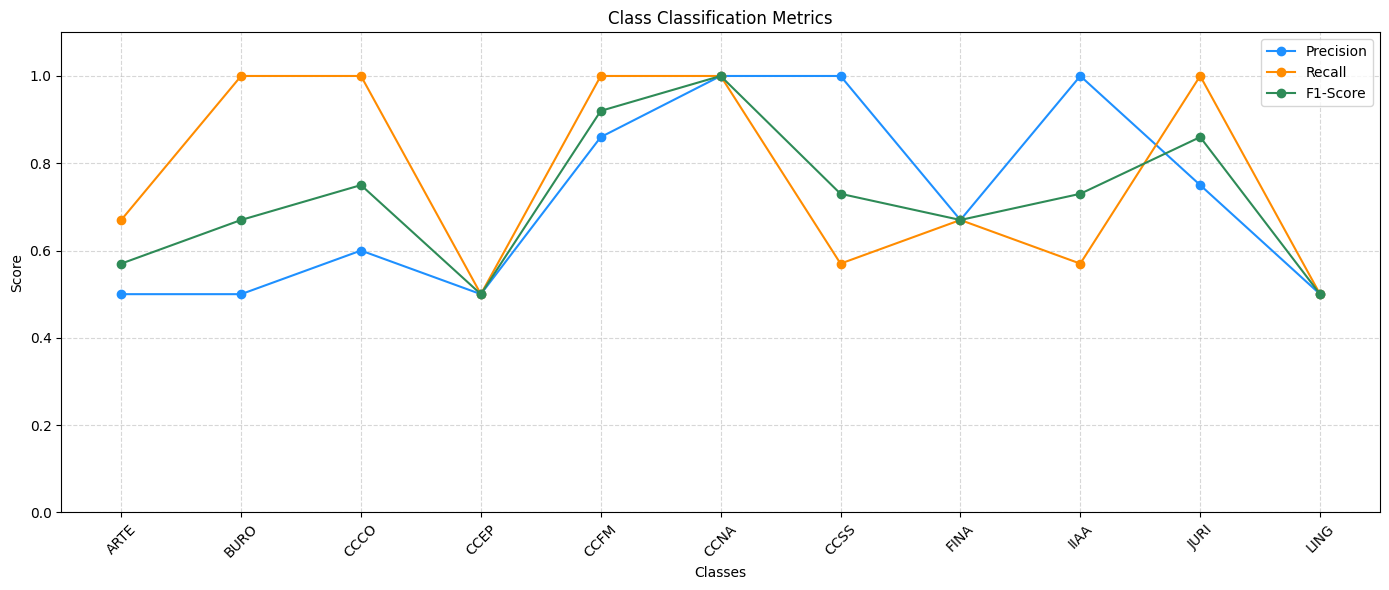

In [45]:
import matplotlib.pyplot as plt

# Clases
clases = ['ARTE', 'BURO', 'CCCO', 'CCEP', 'CCFM', 'CCNA', 'CCSS', 'FINA', 'IIAA', 'JURI', 'LING']

# Nuevas métricas por clase
precision = [0.50, 0.50, 0.60, 0.50, 0.86, 1.00, 1.00, 0.67, 1.00, 0.75, 0.50]
recall    = [0.67, 1.00, 1.00, 0.50, 1.00, 1.00, 0.57, 0.67, 0.57, 1.00, 0.50]
f1_score  = [0.57, 0.67, 0.75, 0.50, 0.92, 1.00, 0.73, 0.67, 0.73, 0.86, 0.50]

# Crear figura
plt.figure(figsize=(14,6))

# Graficar líneas
plt.plot(clases, precision, marker='o', label='Accuracy', linestyle='-', color='dodgerblue')
plt.plot(clases, recall, marker='o', label='Recall', linestyle='-', color='darkorange')
plt.plot(clases, f1_score, marker='o', label='F1-Score', linestyle='-', color='seagreen')

# Configuración del gráfico
plt.title('Class Classification Metrics')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar
plt.show()


=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

        ARTE       1.00      0.67      0.80         3
        BURO       0.50      1.00      0.67         1
        CCCO       0.40      0.67      0.50         3
        CCEP       0.67      1.00      0.80         2
        CCFM       0.75      1.00      0.86         6
        CCNA       1.00      1.00      1.00         3
        CCSS       1.00      0.29      0.44         7
        FINA       0.50      0.67      0.57         3
        IIAA       1.00      0.71      0.83         7
        JURI       0.75      1.00      0.86         3
        LING       0.50      0.50      0.50         2

    accuracy                           0.72        40
   macro avg       0.73      0.77      0.71        40
weighted avg       0.81      0.72      0.71        40



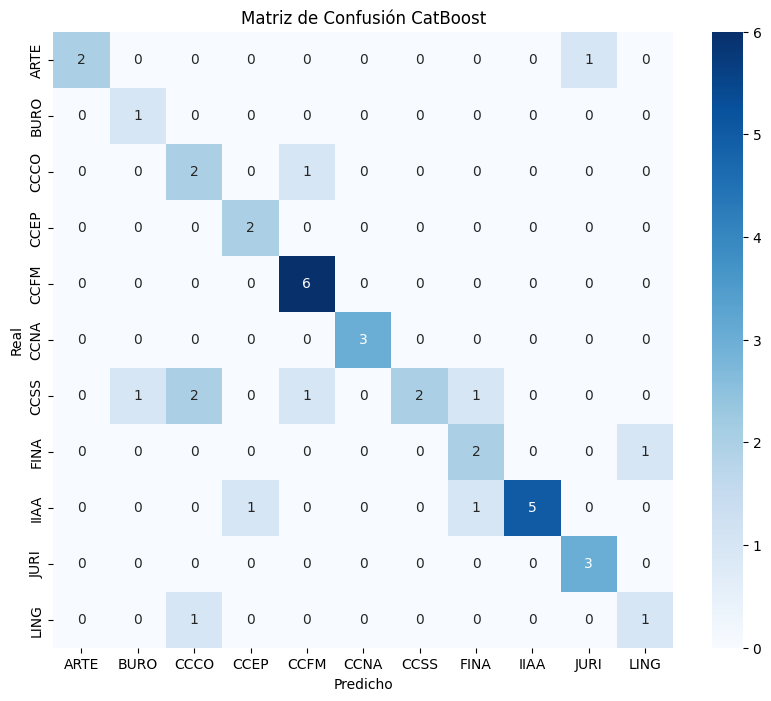

In [40]:
##CATBOOST
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carga tu archivo (ajusta el nombre si es necesario)
df = pd.read_csv('resultados_vocacionales_perfil3.csv')  # O el archivo que corresponda

# Lista de áreas según tus columnas
areas = [
    'CCFM', 'CCSS', 'CCNA', 'CCCO', 'ARTE', 'BURO',
    'CCEP', 'IIAA', 'FINA', 'LING', 'JURI'
]

# Si no tienes la columna 'perfil', créala:
def perfil_area(row):
    puntajes = {area: row[f"{area}_direct"] for area in areas}
    mejor_area = max(puntajes, key=puntajes.get)
    return mejor_area

if 'perfil' not in df.columns:
    df['perfil'] = df.apply(perfil_area, axis=1)

# Variables predictoras y objetivo
X = df[[f"{area}_direct" for area in areas]]
y = df['perfil']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificación de etiquetas
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Entrenamiento del modelo CatBoost
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train_enc)

# Evaluación
y_pred = catboost_model.predict(X_test)
print("=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión CatBoost')
plt.show()

# Ejemplo de predicción para un nuevo registro (ajusta los valores)
# nuevo = [[6, 6, 3, 9, 4, 8, 3, 7, 4, 9, 2]]
# pred = catboost_model.predict(nuevo)
# print("Perfil vocacional predicho:", le.inverse_transform(pred)[0])


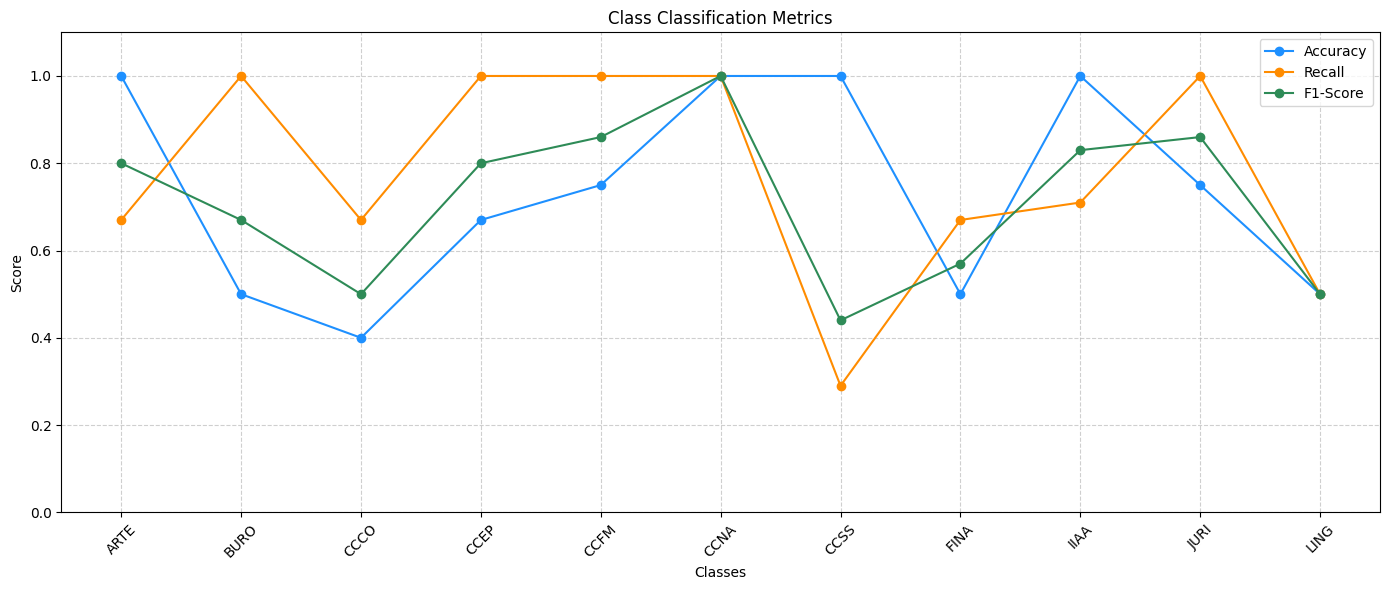

In [55]:
import matplotlib.pyplot as plt

# Nombres de las clases
clases = ['ARTE', 'BURO', 'CCCO', 'CCEP', 'CCFM', 'CCNA', 'CCSS', 'FINA', 'IIAA', 'JURI', 'LING']

# Valores del nuevo reporte
precision = [1.00, 0.50, 0.40, 0.67, 0.75, 1.00, 1.00, 0.50, 1.00, 0.75, 0.50]
recall    = [0.67, 1.00, 0.67, 1.00, 1.00, 1.00, 0.29, 0.67, 0.71, 1.00, 0.50]
f1_score  = [0.80, 0.67, 0.50, 0.80, 0.86, 1.00, 0.44, 0.57, 0.83, 0.86, 0.50]

# Crear figura
plt.figure(figsize=(14,6))

# Graficar líneas
plt.plot(clases, precision, marker='o', label='Accuracy', color='dodgerblue')
plt.plot(clases, recall, marker='o', label='Recall', color='darkorange')
plt.plot(clases, f1_score, marker='o', label='F1-Score', color='seagreen')

# Configuración del gráfico
plt.title('Class Classification Metrics')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar
plt.show()


=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

        ARTE       0.20      1.00      0.33         3
        BURO       0.14      1.00      0.25         1
        CCCO       0.33      0.33      0.33         3
        CCEP       0.67      1.00      0.80         2
        CCFM       0.50      0.33      0.40         6
        CCNA       0.67      0.67      0.67         3
        CCSS       1.00      0.14      0.25         7
        FINA       0.33      0.33      0.33         3
        IIAA       0.00      0.00      0.00         7
        JURI       1.00      0.33      0.50         3
        LING       0.00      0.00      0.00         2

    accuracy                           0.35        40
   macro avg       0.44      0.47      0.35        40
weighted avg       0.48      0.35      0.31        40



C:\Windows\System32\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


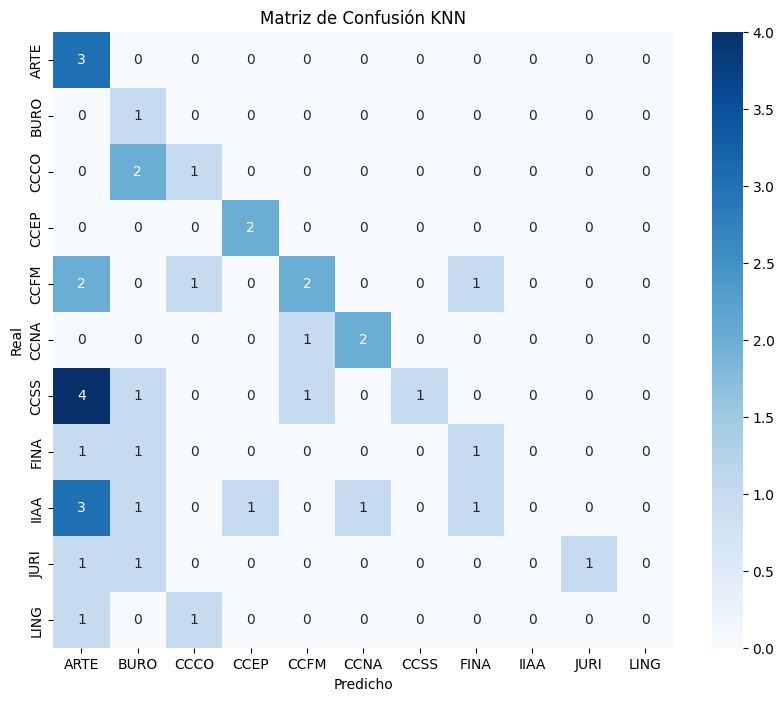

In [42]:
##KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carga tu archivo, ajusta el nombre si es necesario
df = pd.read_csv('resultados_vocacionales_perfil3.csv')  # O el archivo que corresponda

# Lista de áreas según tus columnas
areas = [
    'CCFM', 'CCSS', 'CCNA', 'CCCO', 'ARTE', 'BURO',
    'CCEP', 'IIAA', 'FINA', 'LING', 'JURI'
]

# Si no tienes la columna 'perfil', créala:
def perfil_area(row):
    puntajes = {area: row[f"{area}_direct"] for area in areas}
    mejor_area = max(puntajes, key=puntajes.get)
    return mejor_area

if 'perfil' not in df.columns:
    df['perfil'] = df.apply(perfil_area, axis=1)

# Variables predictoras y objetivo
X = df[[f"{area}_direct" for area in areas]]
y = df['perfil']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificación de etiquetas y escalado de datos
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo KNN (puedes cambiar n_neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train_enc)

# Evaluación
y_pred = knn.predict(X_test_scaled)
print("=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión KNN')
plt.show()

# Ejemplo de predicción para un nuevo registro (ajusta los valores)
# nuevo = [[6, 6, 3, 9, 4, 8, 3, 7, 4, 9, 2]]
# nuevo_scaled = scaler.transform(nuevo)
# pred = knn.predict(nuevo_scaled)
# print("Perfil vocacional predicho:", le.inverse_transform(pred)[0])


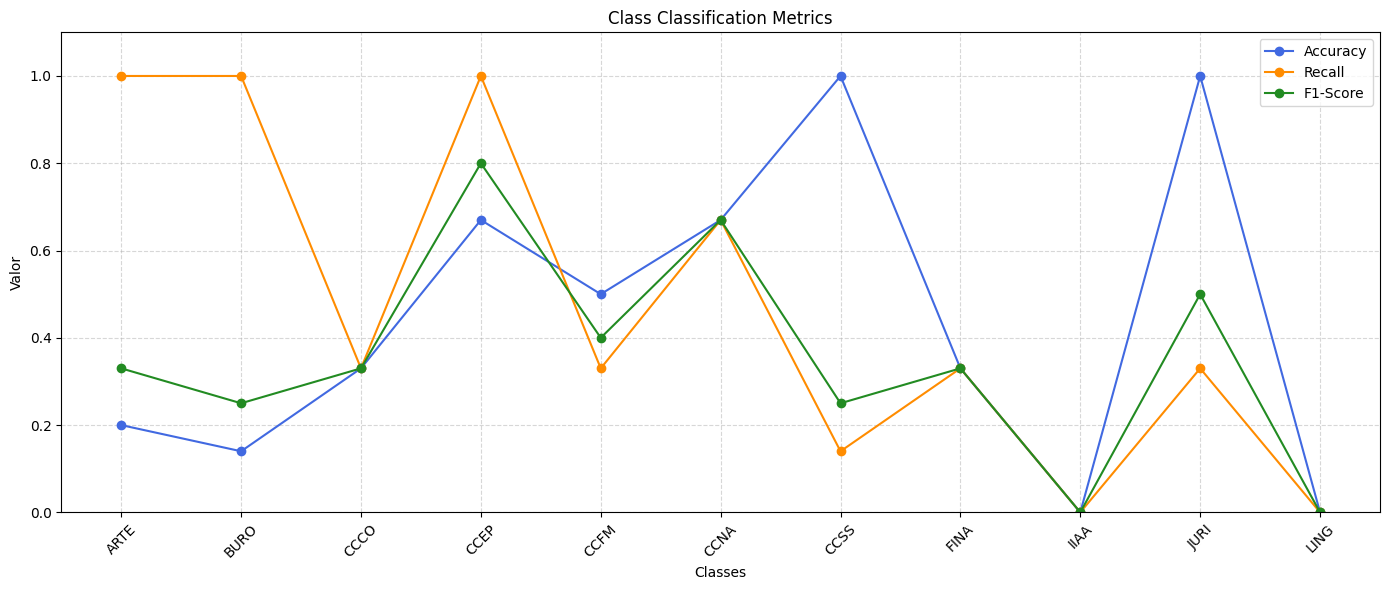

In [56]:
import matplotlib.pyplot as plt

# Nombres de las clases
clases = ['ARTE', 'BURO', 'CCCO', 'CCEP', 'CCFM', 'CCNA', 'CCSS', 'FINA', 'IIAA', 'JURI', 'LING']

# Nuevos valores del reporte
precision = [0.20, 0.14, 0.33, 0.67, 0.50, 0.67, 1.00, 0.33, 0.00, 1.00, 0.00]
recall    = [1.00, 1.00, 0.33, 1.00, 0.33, 0.67, 0.14, 0.33, 0.00, 0.33, 0.00]
f1_score  = [0.33, 0.25, 0.33, 0.80, 0.40, 0.67, 0.25, 0.33, 0.00, 0.50, 0.00]

# Crear figura
plt.figure(figsize=(14,6))

# Graficar métricas por clase
plt.plot(clases, precision, marker='o', label='Accuracy', color='royalblue')
plt.plot(clases, recall, marker='o', label='Recall', color='darkorange')
plt.plot(clases, f1_score, marker='o', label='F1-Score', color='forestgreen')

# Ajustes del gráfico
plt.title('Class Classification Metrics')
plt.xlabel('Classes')
plt.ylabel('Valor')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()


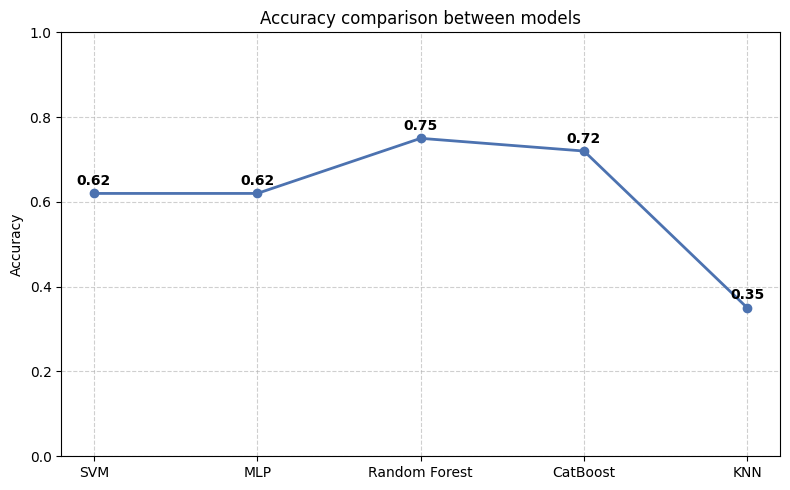

In [54]:
import matplotlib.pyplot as plt

# Resultados de accuracy
accuracy_scores = {
    'SVM': 0.62,
    'MLP': 0.62,
    'Random Forest': 0.75,
    'CatBoost': 0.72,
    'KNN': 0.35
}

# Extraer claves y valores
modelos = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Gráfico lineal
plt.figure(figsize=(8, 5))
plt.plot(modelos, accuracies, marker='o', linestyle='-', color='#4C72B0', linewidth=2)

# Etiquetas y detalles
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy comparison between models')
plt.grid(True, linestyle='--', alpha=0.6)

# Añadir valores encima de los puntos
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()